In [1]:
# https://www.kaggle.com/sandeep3031/breast-cancer-diagnosis-using-ann/notebook
# https://www.kaggle.com/code/damienpark/artificial-neural-network-using-keras/notebook
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data = pd.read_csv('C:/Users/gold/Desktop/models/datas/data.csv')

In [3]:
#reviewing dataset
pd.set_option('display.max_columns',None)
data.head()

,id,sex,age,profession,hypertension,diabetes,coronary heart disease,stroke,others,Treatment time period,Temperature,Pulse,RR,BP,SPO2,anemic appearance,complexion,consciousness,Way to enter wards,borborygmus,obvious cause,pain position,nausea and vomiting,diarrhea and fever,haematemesis,tenesmus,syncope,Persistent pain,other property of pain,Pain scores,pressing pain and rebounding pain,abdominal wall tensity,level
0,1,1,3,0,1,0,0,1,1,2,1,2,2,2,1,1,2,1,2,2,0,5,0,0,0,0,0,1,2,7,1,1,1
1,2,2,3,0,1,1,1,1,1,2,1,2,2,2,1,0,0,1,1,1,0,1,0,0,1,0,0,2,1,2,1,0,1
2,3,2,3,0,1,1,1,0,1,2,1,2,2,2,1,1,0,1,1,3,0,5,0,0,1,0,0,2,1,1,0,0,1
3,4,1,3,0,1,0,1,1,0,1,1,1,2,2,2,1,2,1,2,1,0,4,0,0,1,0,0,2,1,1,0,0,2
4,5,2,3,0,1,0,0,0,1,2,2,2,2,2,1,1,2,1,1,1,0,2,0,1,1,0,0,2,1,1,0,0,2


In [4]:
#checking type of feaures
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   id                                 3231 non-null   int64
 1   sex                                3231 non-null   int64
 2   age                                3231 non-null   int64
 3   profession                         3231 non-null   int64
 4   hypertension                       3231 non-null   int64
 5   diabetes                           3231 non-null   int64
 6   coronary heart disease             3231 non-null   int64
 7   stroke                             3231 non-null   int64
 8   others                             3231 non-null   int64
 9   Treatment time period              3231 non-null   int64
 10  Temperature                        3231 non-null   int64
 11  Pulse                              3231 non-null   int64
 12  RR                  

In [5]:
#dataset has 600 rows and 35 columns
data.shape

(3231, 33)

In [6]:
#taking care of categorical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['level']=le.fit_transform(data['level'])

In [7]:
#defining dependent and independent variables
X = data.drop('level', axis=1)
y = data['level']

In [8]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow import keras
from tensorflow.keras.models import Sequential


input_size = 32
output_size = 4
hidden_layer_size = 50

model = tf.keras.Sequential([
    #Input layer
    tf.keras.layers.Dense(input_size),
    
    #Hidden layer 1
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    #Hidden layer 2
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    #Hidden layer 3
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    
    #Output layer
    tf.keras.layers.Dense(output_size,activation='softmax')
    # return model
])


In [11]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [12]:
NUM_EPOCHS = 50
BATCH_SIZE = 100

early_stopping=tf.keras.callbacks.EarlyStopping(patience=20)

results = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=NUM_EPOCHS,
          callbacks=[early_stopping],
          validation_data=(X_train, y_train),
          verbose=2,validation_steps=10)

Epoch 1/50
26/26 - 2s - loss: 1.1043 - accuracy: 0.4926 - val_loss: 0.8380 - val_accuracy: 0.5840
Epoch 2/50
26/26 - 0s - loss: 0.7412 - accuracy: 0.5948 - val_loss: 0.6679 - val_accuracy: 0.6470
Epoch 3/50
26/26 - 0s - loss: 0.6569 - accuracy: 0.6316 - val_loss: 0.6272 - val_accuracy: 0.6660
Epoch 4/50
26/26 - 0s - loss: 0.6240 - accuracy: 0.6478 - val_loss: 0.6070 - val_accuracy: 0.6710
Epoch 5/50
26/26 - 0s - loss: 0.6003 - accuracy: 0.6641 - val_loss: 0.5818 - val_accuracy: 0.6780
Epoch 6/50
26/26 - 0s - loss: 0.5737 - accuracy: 0.6865 - val_loss: 0.5514 - val_accuracy: 0.7230
Epoch 7/50
26/26 - 0s - loss: 0.5551 - accuracy: 0.6908 - val_loss: 0.5327 - val_accuracy: 0.7180
Epoch 8/50
26/26 - 0s - loss: 0.5409 - accuracy: 0.7012 - val_loss: 0.5187 - val_accuracy: 0.7050
Epoch 9/50
26/26 - 0s - loss: 0.5176 - accuracy: 0.7128 - val_loss: 0.4985 - val_accuracy: 0.7320
Epoch 10/50
26/26 - 0s - loss: 0.5006 - accuracy: 0.7279 - val_loss: 0.4792 - val_accuracy: 0.7430
Epoch 11/50
26/26 -

In [13]:
pd.DataFrame(results.history)

,loss,accuracy,val_loss,val_accuracy
0,1.104308,0.492647,0.838029,0.584
1,0.741227,0.594814,0.667893,0.647
2,0.656870,0.631579,0.627226,0.666
3,0.624005,0.647833,0.607036,0.671
4,0.600348,0.664087,0.581792,0.678
5,0.573750,0.686532,0.551416,0.723
6,0.555088,0.690789,0.532724,0.718
7,0.540938,0.701238,0.518656,0.705
8,0.517620,0.712848,0.498549,0.732
9,0.500553,0.727941,0.479243,0.743


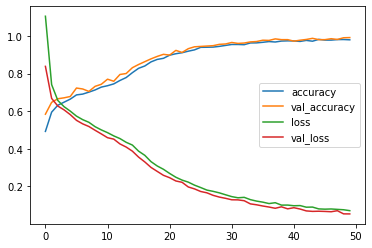

In [14]:
pd.DataFrame(results.history)[['accuracy', 'val_accuracy','loss', 'val_loss']].plot()
plt.savefig('C:\\Users\\gold\\Desktop\\models\\experiment2\\thesisfigures\\Learning Curve1.png',dpi = 1000)
model.save('my_model.h5')


In [15]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 798us/step - loss: 0.2685 - accuracy: 0.9212


[0.2684568464756012, 0.9211746454238892]

In [16]:
# C:\Users\gold\Desktop\models\datasets
# epoch = [1:600]
save = pd.DataFrame(results.history,columns = ['accuracy', 'val_accuracy','loss', 'val_loss'])
# save.to_csv('C:\\Users\\gold\\Desktop\\models\\results.csv',index = False,header = False)
save.to_csv('C:\\Users\\gold\\Desktop\\models\\experiment2\\thesisfigures\\results.csv')

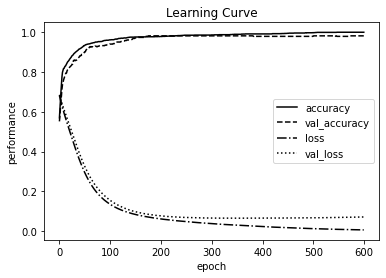

In [17]:
import csv  # 导入csv模块
import matplotlib.pyplot as plt
path = 'C:\\Users\\gold\\Desktop\\models\\results.csv'
data = pd.read_csv(path) #读取文件中所有数据
# epoch = data[['epoch']]

accuracy = data[['accuracy']]
val_accuracy = data[['val_accuracy']]
loss = data[['loss']]
val_loss = data[['val_loss']]

#画折线图
plt.plot(accuracy,label='accuracy',color='black',linestyle='-')
plt.plot(val_accuracy,label='val_accuracy',color='black',linestyle='--')
plt.plot(loss,label='loss',color='black',linestyle='-.')
plt.plot(val_loss,label='val_loss',color='black',linestyle=':')

plt.xlabel('epoch')
plt.ylabel('performance')
plt.title('Learning Curve')
plt.legend()
plt.savefig('C:\\Users\\gold\\Desktop\\models\\experiment2\\thesisfigures\\Learning Curve Image.png',dpi = 1000)
plt.show()


In [18]:
import sklearn.metrics as metrics
# y_pred=model.predict_classes(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)
# y_pred = model.predict(X_test)

# %%Accuracy

# print("Accuracy:",metrics.accuracy_score(np.argmax(y_test, axis = 0),y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# %%f1 score

# print("f1_weighted:",metrics.f1_score(np.argmax(y_test, axis=1), y_pred,average='weighted'))
print("f1_weighted:",metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9211746522411128
f1_weighted: 0.9212192557633172


In [19]:
# Grid Search Cross Validation
# GridSearch Cross Validation Parameters
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32))
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

param_grid = {
   
    'epochs': [50,100,150], 
    'batch_size':[32,50,100],
    'optimizer':['RMSprop', 'Adam','SGD'],
    
}

# create model

# Creating Model Object with KerasClassifier
# create_model = model
model_cv = KerasClassifier(build_fn = build_classifier, verbose=1)


grid = GridSearchCV(estimator = model_cv,  
                    n_jobs = -1, 
                    verbose = 1,
                    cv = 10,
                    param_grid = param_grid)

grid_cv_model = grid.fit(X_train, y_train) # Fitting the GridSearch Object on the Train Set


means = grid_cv_model.cv_results_['mean_test_score'] # Mean of test scores
stds = grid_cv_model.cv_results_['std_test_score'] # standard deviations of test scores
params = grid_cv_model.cv_results_['params'] # parameters used
# to print all scores, standard deviations and parameters used
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Printing the Best Parameters as a Result of Grid Search Cross Validation on the Screen
print("Best: %f using %s" % (grid_cv_model.best_score_, grid_cv_model.best_params_))


Fitting 10 folds for each of 27 candidates, totalling 270 fits
Epoch 1/150
81/81 [==============================] - 0s 1ms/step - loss: 1.2705 - accuracy: 0.3814
Epoch 2/150
81/81 [==============================] - 0s 997us/step - loss: 0.6962 - accuracy: 0.5382
Epoch 3/150
81/81 [==============================] - 0s 985us/step - loss: 0.6955 - accuracy: 0.5356
Epoch 4/150
81/81 [==============================] - 0s 993us/step - loss: 0.6893 - accuracy: 0.5467
Epoch 5/150
81/81 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5718
Epoch 6/150
81/81 [==============================] - 0s 961us/step - loss: 0.6364 - accuracy: 0.6152
Epoch 7/150
81/81 [==============================] - 0s 985us/step - loss: 0.6102 - accuracy: 0.6419
Epoch 8/150
81/81 [==============================] - 0s 974us/step - loss: 0.5908 - accuracy: 0.6719
Epoch 9/150
81/81 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.7096
Epoch 10/150
81/81 [==============

81/81 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9899
Epoch 82/150
81/81 [==============================] - 0s 1ms/step - loss: 0.0366 - accuracy: 0.9883
Epoch 83/150
81/81 [==============================] - 0s 997us/step - loss: 0.0691 - accuracy: 0.9771
Epoch 84/150
81/81 [==============================] - 0s 985us/step - loss: 0.0483 - accuracy: 0.9846
Epoch 85/150
81/81 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9848
Epoch 86/150
81/81 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9844
Epoch 87/150
81/81 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9750
Epoch 88/150
81/81 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9758
Epoch 89/150
81/81 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9710
Epoch 90/150
81/81 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9794
Epoch 91/

In [20]:
cv_model = grid_cv_model.best_estimator_

#%% K-FOLD
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# K-fold accuracy scores

kfold = KFold(n_splits = 10, shuffle=True)
# results = cross_val_score(cv_model, X_test, np.argmax(y_test, axis=1), cv=kfold,scoring= 'accuracy')
results = cross_val_score(cv_model, X_test, y_test, cv=kfold,scoring= 'accuracy')

print('K-fold Cross Validation Accuracy Results: ', results)
print('K-fold Cross Validation Accuracy Results Mean: ', results.mean())

Epoch 1/150
19/19 [==============================] - 0s 1ms/step - loss: 1.3836 - accuracy: 0.3922
Epoch 2/150
19/19 [==============================] - 0s 1ms/step - loss: 1.3243 - accuracy: 0.5578
Epoch 3/150
19/19 [==============================] - 0s 1ms/step - loss: 0.9771 - accuracy: 0.5514
Epoch 4/150
19/19 [==============================] - 0s 1ms/step - loss: 0.7353 - accuracy: 0.5701
Epoch 5/150
19/19 [==============================] - 0s 997us/step - loss: 0.6877 - accuracy: 0.5877
Epoch 6/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5489
Epoch 7/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5547
Epoch 8/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.5860
Epoch 9/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.5832
Epoch 10/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5691
Epoch 1

19/19 [==============================] - 0s 831us/step - loss: 0.2242 - accuracy: 0.8823
Epoch 82/150
19/19 [==============================] - 0s 942us/step - loss: 0.2008 - accuracy: 0.9075
Epoch 83/150
19/19 [==============================] - 0s 997us/step - loss: 0.2010 - accuracy: 0.8980
Epoch 84/150
19/19 [==============================] - 0s 997us/step - loss: 0.2359 - accuracy: 0.8672
Epoch 85/150
19/19 [==============================] - 0s 886us/step - loss: 0.2000 - accuracy: 0.8996
Epoch 86/150
19/19 [==============================] - 0s 942us/step - loss: 0.2089 - accuracy: 0.8919
Epoch 87/150
19/19 [==============================] - 0s 887us/step - loss: 0.1719 - accuracy: 0.9248
Epoch 88/150
19/19 [==============================] - 0s 887us/step - loss: 0.2149 - accuracy: 0.8883
Epoch 89/150
19/19 [==============================] - 0s 998us/step - loss: 0.1898 - accuracy: 0.9015
Epoch 90/150
19/19 [==============================] - 0s 998us/step - loss: 0.2041 - accuracy: 

D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


19/19 [==============================] - 0s 1ms/step - loss: 1.3843 - accuracy: 0.3099
Epoch 2/150
19/19 [==============================] - 0s 1ms/step - loss: 1.3329 - accuracy: 0.5754
Epoch 3/150
19/19 [==============================] - 0s 1ms/step - loss: 0.9998 - accuracy: 0.5874
Epoch 4/150
19/19 [==============================] - 0s 1ms/step - loss: 0.7309 - accuracy: 0.5607
Epoch 5/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.5874
Epoch 6/150
19/19 [==============================] - 0s 997us/step - loss: 0.6847 - accuracy: 0.5719
Epoch 7/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.5928
Epoch 8/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.5908
Epoch 9/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.6021
Epoch 10/150
19/19 [==============================] - 0s 997us/step - loss: 0.6748 - accuracy: 0.5714
Epoch 11/150
19/1

19/19 [==============================] - 0s 942us/step - loss: 0.0886 - accuracy: 0.9723
Epoch 83/150
19/19 [==============================] - 0s 942us/step - loss: 0.1006 - accuracy: 0.9664
Epoch 84/150
19/19 [==============================] - 0s 942us/step - loss: 0.0858 - accuracy: 0.9693
Epoch 85/150
19/19 [==============================] - 0s 942us/step - loss: 0.0808 - accuracy: 0.9738
Epoch 86/150
19/19 [==============================] - 0s 921us/step - loss: 0.0868 - accuracy: 0.9749
Epoch 87/150
19/19 [==============================] - 0s 942us/step - loss: 0.0929 - accuracy: 0.9756
Epoch 88/150
19/19 [==============================] - 0s 997us/step - loss: 0.0904 - accuracy: 0.9718
Epoch 89/150
19/19 [==============================] - 0s 942us/step - loss: 0.1190 - accuracy: 0.9581
Epoch 90/150
19/19 [==============================] - 0s 996us/step - loss: 0.0978 - accuracy: 0.9634
Epoch 91/150
19/19 [==============================] - 0s 942us/step - loss: 0.0741 - accuracy: 

D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


19/19 [==============================] - 0s 1ms/step - loss: 1.3844 - accuracy: 0.3462
Epoch 2/150
19/19 [==============================] - 0s 1ms/step - loss: 1.3294 - accuracy: 0.5195
Epoch 3/150
19/19 [==============================] - 0s 1ms/step - loss: 1.0158 - accuracy: 0.5221
Epoch 4/150
19/19 [==============================] - 0s 1ms/step - loss: 0.7563 - accuracy: 0.5555
Epoch 5/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5613
Epoch 6/150
19/19 [==============================] - 0s 994us/step - loss: 0.6862 - accuracy: 0.5796
Epoch 7/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5250
Epoch 8/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5598
Epoch 9/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5267
Epoch 10/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5515
Epoch 11/150
19/19 

19/19 [==============================] - 0s 998us/step - loss: 0.1304 - accuracy: 0.9578
Epoch 83/150
19/19 [==============================] - 0s 942us/step - loss: 0.1085 - accuracy: 0.9599
Epoch 84/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1390 - accuracy: 0.9427
Epoch 85/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.9434
Epoch 86/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1576 - accuracy: 0.9369
Epoch 87/150
19/19 [==============================] - 0s 997us/step - loss: 0.1434 - accuracy: 0.9471
Epoch 88/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1356 - accuracy: 0.9531
Epoch 89/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1459 - accuracy: 0.9530
Epoch 90/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1364 - accuracy: 0.9533
Epoch 91/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1207 - accuracy: 0.9567
Epoch 9

D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


19/19 [==============================] - 0s 1ms/step - loss: 1.3843 - accuracy: 0.3669
Epoch 2/150
19/19 [==============================] - 0s 1ms/step - loss: 1.3333 - accuracy: 0.5387
Epoch 3/150
19/19 [==============================] - 0s 1ms/step - loss: 1.0034 - accuracy: 0.5417
Epoch 4/150
19/19 [==============================] - 0s 1ms/step - loss: 0.7469 - accuracy: 0.5365
Epoch 5/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5587
Epoch 6/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.6121
Epoch 7/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5074
Epoch 8/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5658
Epoch 9/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.5831
Epoch 10/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6745 - accuracy: 0.5903
Epoch 11/150
19/19 [=

19/19 [==============================] - 0s 1ms/step - loss: 0.2157 - accuracy: 0.9150
Epoch 84/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2187 - accuracy: 0.9094
Epoch 85/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2145 - accuracy: 0.8962
Epoch 86/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2094 - accuracy: 0.8975
Epoch 87/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2176 - accuracy: 0.8876
Epoch 88/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2282 - accuracy: 0.8852
Epoch 89/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1941 - accuracy: 0.9098
Epoch 90/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2028 - accuracy: 0.9071
Epoch 91/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2197 - accuracy: 0.8986
Epoch 92/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1839 - accuracy: 0.9114
Epoch 93/150


D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


19/19 [==============================] - 0s 1ms/step - loss: 1.3842 - accuracy: 0.3257
Epoch 2/150
19/19 [==============================] - 0s 1ms/step - loss: 1.3352 - accuracy: 0.5899
Epoch 3/150
19/19 [==============================] - 0s 1ms/step - loss: 1.0261 - accuracy: 0.5375
Epoch 4/150
19/19 [==============================] - 0s 1ms/step - loss: 0.7375 - accuracy: 0.5798
Epoch 5/150
19/19 [==============================] - 0s 1ms/step - loss: 0.7144 - accuracy: 0.5427
Epoch 6/150
19/19 [==============================] - 0s 1ms/step - loss: 0.7072 - accuracy: 0.5569
Epoch 7/150
19/19 [==============================] - 0s 999us/step - loss: 0.6896 - accuracy: 0.5561
Epoch 8/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.5887
Epoch 9/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5875
Epoch 10/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5541
Epoch 11/150
19/19 

19/19 [==============================] - 0s 942us/step - loss: 0.1092 - accuracy: 0.9475
Epoch 83/150
19/19 [==============================] - 0s 997us/step - loss: 0.1245 - accuracy: 0.9518
Epoch 84/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.9535
Epoch 85/150
19/19 [==============================] - 0s 998us/step - loss: 0.1275 - accuracy: 0.9339
Epoch 86/150
19/19 [==============================] - 0s 997us/step - loss: 0.0984 - accuracy: 0.9644
Epoch 87/150
19/19 [==============================] - 0s 942us/step - loss: 0.0908 - accuracy: 0.9697
Epoch 88/150
19/19 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9570
Epoch 89/150
19/19 [==============================] - 0s 943us/step - loss: 0.0976 - accuracy: 0.9602
Epoch 90/150
19/19 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9694
Epoch 91/150
19/19 [==============================] - 0s 996us/step - loss: 0.0786 - accuracy: 0.9695

D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


19/19 [==============================] - 0s 1ms/step - loss: 1.3846 - accuracy: 0.3650
Epoch 2/150
19/19 [==============================] - 0s 1ms/step - loss: 1.3416 - accuracy: 0.5801
Epoch 3/150
19/19 [==============================] - 0s 1ms/step - loss: 1.1065 - accuracy: 0.5577
Epoch 4/150
19/19 [==============================] - 0s 1ms/step - loss: 0.8339 - accuracy: 0.5661
Epoch 5/150
19/19 [==============================] - 0s 1ms/step - loss: 0.7473 - accuracy: 0.5466
Epoch 6/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5747
Epoch 7/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5901
Epoch 8/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.5673
Epoch 9/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6715 - accuracy: 0.6022
Epoch 10/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.5900
Epoch 11/150
19/19 [=

19/19 [==============================] - 0s 1ms/step - loss: 0.2433 - accuracy: 0.8837
Epoch 83/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2026 - accuracy: 0.9163
Epoch 84/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2261 - accuracy: 0.9012
Epoch 85/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.8786
Epoch 86/150
19/19 [==============================] - 0s 997us/step - loss: 0.2261 - accuracy: 0.9058
Epoch 87/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2303 - accuracy: 0.8973
Epoch 88/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2308 - accuracy: 0.8853
Epoch 89/150
19/19 [==============================] - 0s 1000us/step - loss: 0.2244 - accuracy: 0.8795
Epoch 90/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 0.8869
Epoch 91/150
19/19 [==============================] - 0s 997us/step - loss: 0.1980 - accuracy: 0.9269
Epoch 

D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


19/19 [==============================] - 0s 1ms/step - loss: 1.3849 - accuracy: 0.4219
Epoch 2/150
19/19 [==============================] - 0s 1ms/step - loss: 1.3437 - accuracy: 0.5629
Epoch 3/150
19/19 [==============================] - 0s 1ms/step - loss: 1.0455 - accuracy: 0.5524
Epoch 4/150
19/19 [==============================] - 0s 1ms/step - loss: 0.7407 - accuracy: 0.5642
Epoch 5/150
19/19 [==============================] - 0s 996us/step - loss: 0.6961 - accuracy: 0.5792
Epoch 6/150
19/19 [==============================] - 0s 942us/step - loss: 0.6851 - accuracy: 0.5452
Epoch 7/150
19/19 [==============================] - 0s 998us/step - loss: 0.6784 - accuracy: 0.5723
Epoch 8/150
19/19 [==============================] - 0s 997us/step - loss: 0.6836 - accuracy: 0.5531
Epoch 9/150
19/19 [==============================] - 0s 997us/step - loss: 0.6836 - accuracy: 0.5781
Epoch 10/150
19/19 [==============================] - 0s 997us/step - loss: 0.6801 - accuracy: 0.5522
Epoch 11/

19/19 [==============================] - 0s 1ms/step - loss: 0.2003 - accuracy: 0.9098
Epoch 83/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1914 - accuracy: 0.9203
Epoch 84/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1766 - accuracy: 0.9289
Epoch 85/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2095 - accuracy: 0.8812
Epoch 86/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1693 - accuracy: 0.9356
Epoch 87/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1555 - accuracy: 0.9294
Epoch 88/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1731 - accuracy: 0.9334
Epoch 89/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2016 - accuracy: 0.9121
Epoch 90/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.9270
Epoch 91/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1693 - accuracy: 0.9185
Epoch 92/150


D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


19/19 [==============================] - 0s 1ms/step - loss: 1.3837 - accuracy: 0.4395
Epoch 2/150
19/19 [==============================] - 0s 1ms/step - loss: 1.3207 - accuracy: 0.5712
Epoch 3/150
19/19 [==============================] - 0s 1ms/step - loss: 1.0359 - accuracy: 0.5791
Epoch 4/150
19/19 [==============================] - 0s 1ms/step - loss: 0.7946 - accuracy: 0.5360
Epoch 5/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.5583
Epoch 6/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5767
Epoch 7/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5801
Epoch 8/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5733
Epoch 9/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.5985
Epoch 10/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5766
Epoch 11/150
19/19 [=

19/19 [==============================] - 0s 1ms/step - loss: 0.2093 - accuracy: 0.9013
Epoch 84/150
19/19 [==============================] - 0s 997us/step - loss: 0.2033 - accuracy: 0.9078
Epoch 85/150
19/19 [==============================] - 0s 997us/step - loss: 0.1919 - accuracy: 0.9058
Epoch 86/150
19/19 [==============================] - 0s 997us/step - loss: 0.2167 - accuracy: 0.8987
Epoch 87/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2181 - accuracy: 0.8897
Epoch 88/150
19/19 [==============================] - 0s 998us/step - loss: 0.2106 - accuracy: 0.9085
Epoch 89/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1727 - accuracy: 0.9114
Epoch 90/150
19/19 [==============================] - 0s 997us/step - loss: 0.1955 - accuracy: 0.9168
Epoch 91/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1914 - accuracy: 0.9055
Epoch 92/150
19/19 [==============================] - 0s 997us/step - loss: 0.1929 - accuracy: 0.9054
E

D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


19/19 [==============================] - 0s 1ms/step - loss: 1.3837 - accuracy: 0.4257
Epoch 2/150
19/19 [==============================] - 0s 1ms/step - loss: 1.3220 - accuracy: 0.5857
Epoch 3/150
19/19 [==============================] - 0s 1ms/step - loss: 0.9876 - accuracy: 0.5334
Epoch 4/150
19/19 [==============================] - 0s 1ms/step - loss: 0.7418 - accuracy: 0.5617
Epoch 5/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5897
Epoch 6/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5703
Epoch 7/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5843
Epoch 8/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5591
Epoch 9/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.5936
Epoch 10/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.5847
Epoch 11/150
19/19 [=

19/19 [==============================] - 0s 997us/step - loss: 0.1947 - accuracy: 0.9056
Epoch 83/150
19/19 [==============================] - 0s 997us/step - loss: 0.1874 - accuracy: 0.9243
Epoch 84/150
19/19 [==============================] - 0s 997us/step - loss: 0.1994 - accuracy: 0.9120
Epoch 85/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1943 - accuracy: 0.9223
Epoch 86/150
19/19 [==============================] - 0s 998us/step - loss: 0.2196 - accuracy: 0.9019
Epoch 87/150
19/19 [==============================] - 0s 997us/step - loss: 0.1795 - accuracy: 0.9245
Epoch 88/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1750 - accuracy: 0.9145
Epoch 89/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1902 - accuracy: 0.9085
Epoch 90/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2002 - accuracy: 0.9026
Epoch 91/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1847 - accuracy: 0.8997
Epo

D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/150
19/19 [==============================] - 0s 1ms/step - loss: 1.3846 - accuracy: 0.3270
Epoch 2/150
19/19 [==============================] - 0s 1ms/step - loss: 1.3409 - accuracy: 0.5110
Epoch 3/150
19/19 [==============================] - 0s 1ms/step - loss: 1.0444 - accuracy: 0.5489
Epoch 4/150
19/19 [==============================] - 0s 1ms/step - loss: 0.7409 - accuracy: 0.5856
Epoch 5/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.5583
Epoch 6/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5691
Epoch 7/150
19/19 [==============================] - 0s 1ms/step - loss: 0.7015 - accuracy: 0.5357
Epoch 8/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5610
Epoch 9/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5307
Epoch 10/150
19/19 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5531
Epoch 11/

19/19 [==============================] - 0s 1ms/step - loss: 0.2372 - accuracy: 0.8920
Epoch 83/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2089 - accuracy: 0.9155
Epoch 84/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2003 - accuracy: 0.9253
Epoch 85/150
19/19 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.9130
Epoch 86/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1979 - accuracy: 0.9211
Epoch 87/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1832 - accuracy: 0.9271
Epoch 88/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1878 - accuracy: 0.9297
Epoch 89/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1972 - accuracy: 0.9246
Epoch 90/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1801 - accuracy: 0.9292
Epoch 91/150
19/19 [==============================] - 0s 1ms/step - loss: 0.1801 - accuracy: 0.9183
Epoch 92/150


D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

# Classification Report
model_report = classification_report(y_test, y_pred)
print(model_report)

# Confusion Matrix
model_conf = confusion_matrix(y_test, y_pred)
print(model_conf)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       134
           1       0.90      0.96      0.93       154
           2       0.88      0.93      0.90       141
           3       0.95      0.92      0.93       218

    accuracy                           0.92       647
   macro avg       0.92      0.92      0.92       647
weighted avg       0.92      0.92      0.92       647

[[117  17   0   0]
 [  6 148   0   0]
 [  0   0 131  10]
 [  0   0  18 200]]


In [22]:
x2 = pd.read_csv("C:/Users/gold/Desktop/models/experiment1/PCAtransform.csv")
# C:\Users\gold\Desktop\models\experiment1
# y2 = data['level']
# C:/Users/gold/Desktop/models/newexperiment/4Classes-ROC-and-AUC-of-9 ML~AAPTM
y2 = y

In [23]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [25]:
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow import keras
from tensorflow.keras.models import Sequential


input_size = 11
output_size = 4
hidden_layer_size = 50

model = tf.keras.Sequential([
    #Input layer
    tf.keras.layers.Dense(input_size),
    
    #Hidden layer 1
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    #Hidden layer 2
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    #Hidden layer 3
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    
    #Output layer
    tf.keras.layers.Dense(output_size,activation='softmax')
])


In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
NUM_EPOCHS = 50
BATCH_SIZE = 100

early_stopping=tf.keras.callbacks.EarlyStopping(patience=20)

results2 = model.fit(X2_train, Y2_train,
          batch_size=BATCH_SIZE,
          epochs=NUM_EPOCHS,
          callbacks=[early_stopping],
          validation_data=(X2_train, Y2_train),
          verbose=2,validation_steps=10)

Epoch 1/50
26/26 - 1s - loss: 1.2924 - accuracy: 0.4478 - val_loss: 1.1154 - val_accuracy: 0.5560
Epoch 2/50
26/26 - 0s - loss: 0.9256 - accuracy: 0.5801 - val_loss: 0.7529 - val_accuracy: 0.5920
Epoch 3/50
26/26 - 0s - loss: 0.6957 - accuracy: 0.6053 - val_loss: 0.6556 - val_accuracy: 0.6360
Epoch 4/50
26/26 - 0s - loss: 0.6437 - accuracy: 0.6413 - val_loss: 0.6369 - val_accuracy: 0.6540
Epoch 5/50
26/26 - 0s - loss: 0.6215 - accuracy: 0.6563 - val_loss: 0.6077 - val_accuracy: 0.6690
Epoch 6/50
26/26 - 0s - loss: 0.6028 - accuracy: 0.6629 - val_loss: 0.5930 - val_accuracy: 0.6780
Epoch 7/50
26/26 - 0s - loss: 0.5942 - accuracy: 0.6707 - val_loss: 0.5812 - val_accuracy: 0.6780
Epoch 8/50
26/26 - 0s - loss: 0.5790 - accuracy: 0.6854 - val_loss: 0.5737 - val_accuracy: 0.6820
Epoch 9/50
26/26 - 0s - loss: 0.5667 - accuracy: 0.7001 - val_loss: 0.5571 - val_accuracy: 0.7050
Epoch 10/50
26/26 - 0s - loss: 0.5544 - accuracy: 0.7117 - val_loss: 0.5530 - val_accuracy: 0.7110
Epoch 11/50
26/26 -

In [28]:
pd.DataFrame(results2.history)

,loss,accuracy,val_loss,val_accuracy
0,1.292438,0.447755,1.115381,0.556
1,0.925643,0.580108,0.752940,0.592
2,0.695656,0.605263,0.655583,0.636
3,0.643733,0.641254,0.636923,0.654
4,0.621521,0.656347,0.607684,0.669
5,0.602818,0.662926,0.592985,0.678
6,0.594174,0.670666,0.581211,0.678
7,0.578962,0.685372,0.573651,0.682
8,0.566673,0.700077,0.557065,0.705
9,0.554377,0.711687,0.553004,0.711


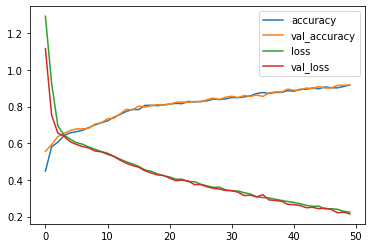

In [29]:
pd.DataFrame(results2.history)[['accuracy', 'val_accuracy','loss', 'val_loss']].plot()
plt.savefig('C:\\Users\\gold\\Desktop\\models\\experiment2\\thesisfigures\\Learning Curve2.png',dpi = 1000)

In [30]:
model.evaluate(X2_test, Y2_test)

21/21 [==============================] - 0s 798us/step - loss: 0.3912 - accuracy: 0.8532


[0.39122331142425537, 0.8531684875488281]

In [31]:
save = pd.DataFrame(results2.history,columns = ['accuracy', 'val_accuracy','loss', 'val_loss'])
# save.to_csv('C:\\Users\\gold\\Desktop\\models\\results.csv',index = False,header = False)
save.to_csv('C:\\Users\\gold\\Desktop\\models\\experiment2\\thesisfigures\\results2.csv')

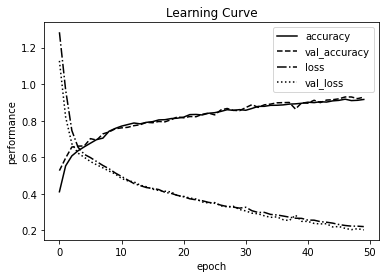

In [32]:
import csv  # 导入csv模块
import matplotlib.pyplot as plt
path = 'C:\\Users\\gold\\Desktop\\models\\results2.csv'
data = pd.read_csv(path) #读取文件中所有数据
# epoch = data[['epoch']]

accuracy = data[['accuracy']]
val_accuracy = data[['val_accuracy']]
loss = data[['loss']]
val_loss = data[['val_loss']]

#画折线图
plt.plot(accuracy,label='accuracy',color='black',linestyle='-')
plt.plot(val_accuracy,label='val_accuracy',color='black',linestyle='--')
plt.plot(loss,label='loss',color='black',linestyle='-.')
plt.plot(val_loss,label='val_loss',color='black',linestyle=':')

plt.xlabel('epoch')
plt.ylabel('performance')
plt.title('Learning Curve')
plt.legend()
plt.savefig('C:\\Users\\gold\\Desktop\\models\\experiment2\\thesisfigures\\Learning Curve Image.png',dpi = 1000)
plt.show()

# plt.savefig('C:\\Users\\gold\\Desktop\\models\\Learning Curve Image',dpi = 600)
# plt.savefig('plotLearning Curve Image.png',dpi = 600)

In [33]:
x3 = pd.read_csv("C:/Users/gold/Desktop/models/experiment1/PCAtransform2.csv")
# C:\Users\gold\Desktop\models\experiment1
# y2 = data['level']
y3 = y

In [34]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
X3_train, X3_test, Y3_train, Y3_test = train_test_split(x3, y3, test_size = 0.2, random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)

In [36]:
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow import keras
from tensorflow.keras.models import Sequential


input_size = 6
output_size = 4
hidden_layer_size = 50

model=tf.keras.Sequential([
    #Input layer
    tf.keras.layers.Dense(input_size),
    
    #Hidden layer 1
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    #Hidden layer 2
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    #Hidden layer 3
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    
    #Output layer
    tf.keras.layers.Dense(output_size,activation='softmax')
])


In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
NUM_EPOCHS = 50
BATCH_SIZE = 100

early_stopping=tf.keras.callbacks.EarlyStopping(patience=20)

results3 = model.fit(X3_train, Y3_train,
          batch_size=BATCH_SIZE,
          epochs=NUM_EPOCHS,
          callbacks=[early_stopping],
          validation_data=(X3_train, Y3_train),
          verbose=2,validation_steps=10)

Epoch 1/50
26/26 - 1s - loss: 1.2280 - accuracy: 0.4435 - val_loss: 1.0086 - val_accuracy: 0.5560
Epoch 2/50
26/26 - 0s - loss: 0.8628 - accuracy: 0.5755 - val_loss: 0.7501 - val_accuracy: 0.5810
Epoch 3/50
26/26 - 0s - loss: 0.7032 - accuracy: 0.6080 - val_loss: 0.6744 - val_accuracy: 0.6030
Epoch 4/50
26/26 - 0s - loss: 0.6531 - accuracy: 0.6440 - val_loss: 0.6461 - val_accuracy: 0.6290
Epoch 5/50
26/26 - 0s - loss: 0.6296 - accuracy: 0.6873 - val_loss: 0.6179 - val_accuracy: 0.6790
Epoch 6/50
26/26 - 0s - loss: 0.6076 - accuracy: 0.6970 - val_loss: 0.5964 - val_accuracy: 0.7090
Epoch 7/50
26/26 - 0s - loss: 0.5822 - accuracy: 0.7276 - val_loss: 0.5968 - val_accuracy: 0.6970
Epoch 8/50
26/26 - 0s - loss: 0.5719 - accuracy: 0.7330 - val_loss: 0.5733 - val_accuracy: 0.7280
Epoch 9/50
26/26 - 0s - loss: 0.5458 - accuracy: 0.7566 - val_loss: 0.5409 - val_accuracy: 0.7670
Epoch 10/50
26/26 - 0s - loss: 0.5207 - accuracy: 0.7686 - val_loss: 0.5175 - val_accuracy: 0.7810
Epoch 11/50
26/26 -

In [39]:
pd.DataFrame(results3.history)

,loss,accuracy,val_loss,val_accuracy
0,1.227964,0.443498,1.008630,0.556
1,0.862779,0.575464,0.750149,0.581
2,0.703168,0.607972,0.674373,0.603
3,0.653078,0.643963,0.646056,0.629
4,0.629648,0.687307,0.617874,0.679
5,0.607554,0.696981,0.596423,0.709
6,0.582232,0.727554,0.596797,0.697
7,0.571878,0.732972,0.573280,0.728
8,0.545795,0.756579,0.540890,0.767
9,0.520698,0.768576,0.517484,0.781


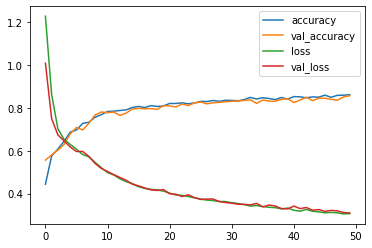

In [40]:
pd.DataFrame(results3.history)[['accuracy', 'val_accuracy','loss', 'val_loss']].plot()
plt.savefig('C:\\Users\\gold\\Desktop\\models\\experiment2\\thesisfigures\\Learning Curve3.png',dpi = 1000)

In [41]:
model.evaluate(X3_test, Y3_test)

21/21 [==============================] - 0s 750us/step - loss: 0.3492 - accuracy: 0.8362


[0.3492428660392761, 0.8361669182777405]

In [42]:
save = pd.DataFrame(results3.history,columns = ['accuracy', 'val_accuracy','loss', 'val_loss'])
# save.to_csv('C:\\Users\\gold\\Desktop\\models\\results.csv',index = False,header = False)
save.to_csv('C:\\Users\\gold\\Desktop\\models\\experiment2\\thesisfigures\\results3.csv')

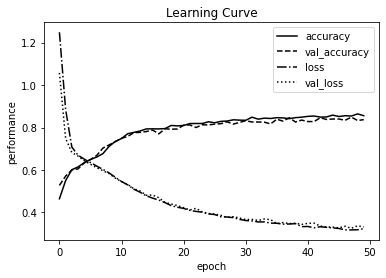

In [43]:
import csv  # 导入csv模块
import matplotlib.pyplot as plt
path = 'C:\\Users\\gold\\Desktop\\models\\results3.csv'
data = pd.read_csv(path) #读取文件中所有数据
# epoch = data[['epoch']]

accuracy = data[['accuracy']]
val_accuracy = data[['val_accuracy']]
loss = data[['loss']]
val_loss = data[['val_loss']]

#画折线图
plt.plot(accuracy,label='accuracy',color='black',linestyle='-')
plt.plot(val_accuracy,label='val_accuracy',color='black',linestyle='--')
plt.plot(loss,label='loss',color='black',linestyle='-.')
plt.plot(val_loss,label='val_loss',color='black',linestyle=':')

plt.xlabel('epoch')
plt.ylabel('performance')
plt.title('Learning Curve')
plt.legend()
plt.savefig('C:\\Users\\gold\\Desktop\\models\\experiment2\\thesisfigures\\Learning Curve Image3.png',dpi = 1000)
plt.show()

# plt.savefig('C:\\Users\\gold\\Desktop\\models\\Learning Curve Image',dpi = 600)
# plt.savefig('plotLearning Curve Image.png',dpi = 600)

In [44]:
import sklearn.metrics as metrics
# y_pred=model.predict_classes(X_test)
Y_pred = np.argmax(model.predict(X3_test), axis=-1)
# y_pred = model.predict(X_test)

# %%Accuracy

# print("Accuracy:",metrics.accuracy_score(np.argmax(y_test, axis = 0),y_pred))
print("Accuracy:",metrics.accuracy_score(Y3_test, Y_pred))
# %%f1 score

# print("f1_weighted:",metrics.f1_score(np.argmax(y_test, axis=1), y_pred,average='weighted'))
print("f1_weighted:",metrics.f1_score(Y3_test, Y_pred, average='weighted'))

Accuracy: 0.8361669242658424
f1_weighted: 0.835160314003273


In [45]:
# Grid Search Cross Validation
# GridSearch Cross Validation Parameters
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

param_grid = {
   
    'epochs': [50,100,150], 
    'batch_size':[32,50,100],
    'optimizer':['RMSprop', 'Adam','SGD'],
    
}

# create model

# Creating Model Object with KerasClassifier
# create_model = model
model_cv = KerasClassifier(build_fn = build_classifier, verbose=1)


grid = GridSearchCV(estimator = model_cv,  
                    n_jobs = -1, 
                    verbose = 1,
                    cv = 10,
                    param_grid = param_grid)

grid_cv_model = grid.fit(X3_train, Y3_train) # Fitting the GridSearch Object on the Train Set


means = grid_cv_model.cv_results_['mean_test_score'] # Mean of test scores
stds = grid_cv_model.cv_results_['std_test_score'] # standard deviations of test scores
params = grid_cv_model.cv_results_['params'] # parameters used
# to print all scores, standard deviations and parameters used
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Printing the Best Parameters as a Result of Grid Search Cross Validation on the Screen
print("Best: %f using %s" % (grid_cv_model.best_score_, grid_cv_model.best_params_))


Fitting 10 folds for each of 27 candidates, totalling 270 fits
Epoch 1/150
52/52 [==============================] - 0s 1ms/step - loss: 1.3629 - accuracy: 0.3687
Epoch 2/150
52/52 [==============================] - 0s 1ms/step - loss: 0.8025 - accuracy: 0.5371
Epoch 3/150
52/52 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5419
Epoch 4/150
52/52 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5631
Epoch 5/150
52/52 [==============================] - 0s 978us/step - loss: 0.6789 - accuracy: 0.5740
Epoch 6/150
52/52 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.6425
Epoch 7/150
52/52 [==============================] - 0s 978us/step - loss: 0.6121 - accuracy: 0.6359
Epoch 8/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5909 - accuracy: 0.6386
Epoch 9/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5894 - accuracy: 0.6481
Epoch 10/150
52/52 [======================

52/52 [==============================] - 0s 991us/step - loss: 0.3002 - accuracy: 0.8488
Epoch 82/150
52/52 [==============================] - 0s 997us/step - loss: 0.2964 - accuracy: 0.8549
Epoch 83/150
52/52 [==============================] - 0s 1ms/step - loss: 0.2982 - accuracy: 0.8616
Epoch 84/150
52/52 [==============================] - 0s 1ms/step - loss: 0.3221 - accuracy: 0.8338
Epoch 85/150
52/52 [==============================] - 0s 978us/step - loss: 0.3120 - accuracy: 0.8393
Epoch 86/150
52/52 [==============================] - 0s 978us/step - loss: 0.3149 - accuracy: 0.8497
Epoch 87/150
52/52 [==============================] - 0s 958us/step - loss: 0.3034 - accuracy: 0.8516
Epoch 88/150
52/52 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.8563
Epoch 89/150
52/52 [==============================] - 0s 978us/step - loss: 0.2952 - accuracy: 0.8561
Epoch 90/150
52/52 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8423
E

In [46]:
cv_model = grid_cv_model.best_estimator_

#%% K-FOLD
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# K-fold accuracy scores

kfold = KFold(n_splits = 10, shuffle=True)
# results = cross_val_score(cv_model, X_test, np.argmax(y_test, axis=1), cv=kfold,scoring= 'accuracy')
results = cross_val_score(cv_model, X3_test, Y3_test, cv=kfold,scoring= 'accuracy')

print('K-fold Cross Validation Accuracy Results: ', results)
print('K-fold Cross Validation Accuracy Results Mean: ', results.mean())

Epoch 1/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3856 - accuracy: 0.2920
Epoch 2/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3783 - accuracy: 0.3436
Epoch 3/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3453 - accuracy: 0.4332
Epoch 4/150
12/12 [==============================] - 0s 1ms/step - loss: 1.2319 - accuracy: 0.5558
Epoch 5/150
12/12 [==============================] - 0s 1ms/step - loss: 0.9797 - accuracy: 0.6100
Epoch 6/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7718 - accuracy: 0.5933
Epoch 7/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7172 - accuracy: 0.5873
Epoch 8/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5855
Epoch 9/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7000 - accuracy: 0.5579
Epoch 10/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5793
Epoch 11/

12/12 [==============================] - 0s 997us/step - loss: 0.4441 - accuracy: 0.8152
Epoch 83/150
12/12 [==============================] - 0s 997us/step - loss: 0.4184 - accuracy: 0.8163
Epoch 84/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8247
Epoch 85/150
12/12 [==============================] - 0s 997us/step - loss: 0.4069 - accuracy: 0.8088
Epoch 86/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8244
Epoch 87/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.8528
Epoch 88/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8079
Epoch 89/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8308
Epoch 90/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.7892
Epoch 91/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4205 - accuracy: 0.8186
Epoch 9

D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 0s 1ms/step - loss: 1.3858 - accuracy: 0.2769
Epoch 2/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3788 - accuracy: 0.4380
Epoch 3/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3513 - accuracy: 0.5612
Epoch 4/150
12/12 [==============================] - 0s 1ms/step - loss: 1.2508 - accuracy: 0.5584
Epoch 5/150
12/12 [==============================] - 0s 1ms/step - loss: 1.0197 - accuracy: 0.6012
Epoch 6/150
12/12 [==============================] - 0s 1ms/step - loss: 0.8090 - accuracy: 0.5526
Epoch 7/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7083 - accuracy: 0.5965
Epoch 8/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5866
Epoch 9/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5930
Epoch 10/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5601
Epoch 11/150
12/12 [=

12/12 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.8312
Epoch 83/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8021
Epoch 84/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.8250
Epoch 85/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.7791
Epoch 86/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.8194
Epoch 87/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8190
Epoch 88/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8311
Epoch 89/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.7947
Epoch 90/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8134
Epoch 91/150
12/12 [==============================] - 0s 997us/step - loss: 0.4164 - accuracy: 0.7917
Epoch 92/15

D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 0s 1ms/step - loss: 1.3855 - accuracy: 0.3119
Epoch 2/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3772 - accuracy: 0.3594
Epoch 3/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3409 - accuracy: 0.5736
Epoch 4/150
12/12 [==============================] - 0s 1ms/step - loss: 1.2265 - accuracy: 0.5832
Epoch 5/150
12/12 [==============================] - 0s 1ms/step - loss: 0.9770 - accuracy: 0.5840
Epoch 6/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7750 - accuracy: 0.5492
Epoch 7/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7065 - accuracy: 0.5871
Epoch 8/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5861
Epoch 9/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5860
Epoch 10/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.5821
Epoch 11/150
12/12 [=

12/12 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8293
Epoch 83/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8461
Epoch 84/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8306
Epoch 85/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8576
Epoch 86/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.8345
Epoch 87/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8610
Epoch 88/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8442
Epoch 89/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8367
Epoch 90/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8263
Epoch 91/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8278
Epoch 92/150


D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 0s 1ms/step - loss: 1.3854 - accuracy: 0.2944
Epoch 2/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3781 - accuracy: 0.3533
Epoch 3/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3472 - accuracy: 0.5875
Epoch 4/150
12/12 [==============================] - 0s 1ms/step - loss: 1.2412 - accuracy: 0.5803
Epoch 5/150
12/12 [==============================] - 0s 1ms/step - loss: 1.0064 - accuracy: 0.5940
Epoch 6/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7894 - accuracy: 0.5912
Epoch 7/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6996 - accuracy: 0.5898
Epoch 8/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5841
Epoch 9/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5706
Epoch 10/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.5862
Epoch 11/150
12/12 [=

12/12 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8303
Epoch 84/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3182 - accuracy: 0.8559
Epoch 85/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8303
Epoch 86/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8158
Epoch 87/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8508
Epoch 88/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8692
Epoch 89/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8351
Epoch 90/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.8308
Epoch 91/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8564
Epoch 92/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3768 - accuracy: 0.8105
Epoch 93/150


D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3855 - accuracy: 0.3195
Epoch 2/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3777 - accuracy: 0.4323
Epoch 3/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3425 - accuracy: 0.5702
Epoch 4/150
12/12 [==============================] - 0s 1ms/step - loss: 1.2244 - accuracy: 0.5435
Epoch 5/150
12/12 [==============================] - 0s 1ms/step - loss: 0.9819 - accuracy: 0.5808
Epoch 6/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7737 - accuracy: 0.5770
Epoch 7/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.5812
Epoch 8/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5544
Epoch 9/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.5830
Epoch 10/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.5808
Epoch 11/

Epoch 83/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.8304
Epoch 84/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.8392
Epoch 85/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.8360
Epoch 86/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.8211
Epoch 87/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.8163
Epoch 88/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.8459
Epoch 89/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.8383
Epoch 90/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.8531
Epoch 91/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8656
Epoch 92/150
12/12 [==============================] - 0s 998us/step - loss: 0.4289 - accuracy: 0.839

D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 0s 1ms/step - loss: 1.3856 - accuracy: 0.3408
Epoch 2/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3791 - accuracy: 0.5599
Epoch 3/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3508 - accuracy: 0.5429
Epoch 4/150
12/12 [==============================] - 0s 1ms/step - loss: 1.2483 - accuracy: 0.5545
Epoch 5/150
12/12 [==============================] - 0s 1ms/step - loss: 1.0277 - accuracy: 0.5776
Epoch 6/150
12/12 [==============================] - 0s 1ms/step - loss: 0.8301 - accuracy: 0.5702
Epoch 7/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7130 - accuracy: 0.5689
Epoch 8/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5795
Epoch 9/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5847
Epoch 10/150
12/12 [==============================] - 0s 997us/step - loss: 0.6834 - accuracy: 0.5858
Epoch 11/150
12/12 

Epoch 83/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.7834
Epoch 84/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8103
Epoch 85/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.7904
Epoch 86/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8124
Epoch 87/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.7741
Epoch 88/150
12/12 [==============================] - 0s 994us/step - loss: 0.4364 - accuracy: 0.7859
Epoch 89/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8147
Epoch 90/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.7877
Epoch 91/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.7826
Epoch 92/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.830

D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 0s 1ms/step - loss: 1.3851 - accuracy: 0.3623
Epoch 2/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3727 - accuracy: 0.3566
Epoch 3/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3230 - accuracy: 0.5688
Epoch 4/150
12/12 [==============================] - 0s 1ms/step - loss: 1.1844 - accuracy: 0.5607
Epoch 5/150
12/12 [==============================] - 0s 1ms/step - loss: 0.9262 - accuracy: 0.5562
Epoch 6/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7586 - accuracy: 0.5492
Epoch 7/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.5588
Epoch 8/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.5535
Epoch 9/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5491
Epoch 10/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5356
Epoch 11/150
12/12 [=

12/12 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.8051
Epoch 84/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.8185
Epoch 85/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8246
Epoch 86/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.8241
Epoch 87/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8142
Epoch 88/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.7845
Epoch 89/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8541
Epoch 90/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.7915
Epoch 91/150
12/12 [==============================] - 0s 997us/step - loss: 0.4318 - accuracy: 0.7982
Epoch 92/150
12/12 [==============================] - 0s 997us/step - loss: 0.4243 - accuracy: 0.8328
Epoch 93/

D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 0s 1ms/step - loss: 1.3855 - accuracy: 0.2994
Epoch 2/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3771 - accuracy: 0.3561
Epoch 3/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3437 - accuracy: 0.5606
Epoch 4/150
12/12 [==============================] - 0s 1ms/step - loss: 1.2278 - accuracy: 0.5775
Epoch 5/150
12/12 [==============================] - 0s 1ms/step - loss: 0.9909 - accuracy: 0.5789
Epoch 6/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7711 - accuracy: 0.5730
Epoch 7/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7267 - accuracy: 0.5400
Epoch 8/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.5665
Epoch 9/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5571
Epoch 10/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5838
Epoch 11/150
12/12 [=

12/12 [==============================] - 0s 1ms/step - loss: 0.5032 - accuracy: 0.7388
Epoch 84/150
12/12 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7376
Epoch 85/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.7310
Epoch 86/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7787
Epoch 87/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7623
Epoch 88/150
12/12 [==============================] - 0s 1ms/step - loss: 0.5088 - accuracy: 0.7656
Epoch 89/150
12/12 [==============================] - 0s 997us/step - loss: 0.4796 - accuracy: 0.7745
Epoch 90/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4627 - accuracy: 0.7949
Epoch 91/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.7888
Epoch 92/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.8161
Epoch 93/15

D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 0s 1ms/step - loss: 1.3855 - accuracy: 0.3609
Epoch 2/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3784 - accuracy: 0.3828
Epoch 3/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3459 - accuracy: 0.5821
Epoch 4/150
12/12 [==============================] - 0s 1ms/step - loss: 1.2336 - accuracy: 0.5568
Epoch 5/150
12/12 [==============================] - 0s 1ms/step - loss: 0.9990 - accuracy: 0.5978
Epoch 6/150
12/12 [==============================] - 0s 1ms/step - loss: 0.8033 - accuracy: 0.5724
Epoch 7/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7394 - accuracy: 0.5783
Epoch 8/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5922
Epoch 9/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.6157
Epoch 10/150
12/12 [==============================] - 0s 998us/step - loss: 0.6967 - accuracy: 0.5724
Epoch 11/150
12/12 

12/12 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7936
Epoch 83/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8333
Epoch 84/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.8363
Epoch 85/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.8478
Epoch 86/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8271
Epoch 87/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3935 - accuracy: 0.8676
Epoch 88/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.7871
Epoch 89/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.8418
Epoch 90/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.7935
Epoch 91/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.7988
Epoch 92/150


D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


12/12 [==============================] - 0s 1ms/step - loss: 1.3855 - accuracy: 0.3636
Epoch 2/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3774 - accuracy: 0.3351
Epoch 3/150
12/12 [==============================] - 0s 1ms/step - loss: 1.3350 - accuracy: 0.4582
Epoch 4/150
12/12 [==============================] - 0s 1ms/step - loss: 1.2043 - accuracy: 0.5888
Epoch 5/150
12/12 [==============================] - 0s 1ms/step - loss: 0.9690 - accuracy: 0.5748
Epoch 6/150
12/12 [==============================] - 0s 1ms/step - loss: 0.8192 - accuracy: 0.5267
Epoch 7/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7140 - accuracy: 0.5441
Epoch 8/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7070 - accuracy: 0.5304
Epoch 9/150
12/12 [==============================] - 0s 997us/step - loss: 0.6845 - accuracy: 0.5663
Epoch 10/150
12/12 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.5417
Epoch 11/150
12/12 

12/12 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.8073
Epoch 84/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4028 - accuracy: 0.8449
Epoch 85/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8039
Epoch 86/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8115
Epoch 87/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8463
Epoch 88/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8490
Epoch 89/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8243
Epoch 90/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8474
Epoch 91/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8350
Epoch 92/150
12/12 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8500
Epoch 93/150


D:\Anaconda3\position\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [47]:
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

# Classification Report
model_report = classification_report(Y3_test, Y_pred)
print(model_report)

# Confusion Matrix
model_conf = confusion_matrix(Y3_test, Y_pred)
print(model_conf)

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       134
           1       0.73      0.82      0.77       154
           2       0.90      0.89      0.89       141
           3       0.93      0.93      0.93       218

    accuracy                           0.84       647
   macro avg       0.83      0.82      0.82       647
weighted avg       0.84      0.84      0.84       647

[[ 86  48   0   0]
 [ 27 127   0   0]
 [  1   0 125  15]
 [  1   0  14 203]]
